In [ ]:
!pip install pytorch-tabular==1.1.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: einops
    Found existing installation: einops 0.8.1
    Uninstalling einops-0.8.1:
      Successfully uninstalled einops-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ CORRECT IMPORTS - from pytorch_tabular (NOT pytorch_tabnet!)
from pytorch_tabular import TabularModel
from pytorch_tabular.models import TabTransformerConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig

print("="*80)
print("✅ ALL IMPORTS SUCCESSFUL!")

✅ ALL IMPORTS SUCCESSFUL!


In [ ]:
# ============================================================================
# 1. SETUP & IMPORTS
# ============================================================================



from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE, mutual_info_regression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")


✓ All libraries imported successfully!


In [ ]:
# ============================================================================
# 2. DATA LOADING
# ============================================================================

# Upload your CSV file in Colab
from google.colab import files
print("Please upload your Indian Personal Finance dataset CSV file:")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print(f"\n✓ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

Please upload your Indian Personal Finance dataset CSV file:


Saving data.csv to data.csv

✓ Dataset loaded successfully!
Shape: (20000, 27)

First few rows:
          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport   Eating_Out  \
0        0.000000  2206.490129   6658.768341  2636.970696  1651.801726   
1        0.000000   869.522617   2818.444460  1543.018778   649.378103   
2     4612.103386  2201.800050   6313.222081  3221.396403  1513.814376   
3     6809.441427  4889.418087  14690.149363  7106.130005  5040.249158   
4     3112.609398   635.907170   3034.329665  1276.155163   692.827225   

  

In [ ]:

# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)



EXPLORATORY DATA ANALYSIS


In [ ]:
# Basic info
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Ut

In [ ]:

print("\n Statistical Summary:")
print(df.describe())


 Statistical Summary:
             Income           Age    Dependents           Rent  \
count  2.000000e+04  20000.000000  20000.000000   20000.000000   
mean   4.158550e+04     41.031450      1.995950    9115.494629   
std    4.001454e+04     13.578725      1.417616    9254.228188   
min    1.301187e+03     18.000000      0.000000     235.365692   
25%    1.760488e+04     29.000000      1.000000    3649.422246   
50%    3.018538e+04     41.000000      2.000000    6402.751824   
75%    5.176545e+04     53.000000      3.000000   11263.940492   
max    1.079728e+06     64.000000      4.000000  215945.674703   

       Loan_Repayment     Insurance      Groceries     Transport  \
count    20000.000000  20000.000000   20000.000000  20000.000000   
mean      2049.800292   1455.028761    5205.667493   2704.466685   
std       4281.789941   1492.938435    5035.953689   2666.345648   
min          0.000000     30.002012     154.078240     81.228584   
25%          0.000000    580.204749    216

In [ ]:
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")


🔍 Missing Values:
No missing values found!


In [ ]:
print("\n Columns in dataset:")
print(df.columns.tolist())


 Columns in dataset:
['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n Duplicate rows: {duplicates}")


 Duplicate rows: 0


In [ ]:
# ============================================================================
# 4. DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Create a copy for preprocessing
df_processed = df.copy()


DATA PREPROCESSING


In [ ]:
print("\n Identifying Feature Types...")

# Define expense categories
expense_columns = [
    'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport',
    'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare',
    'Education', 'Miscellaneous'
]

# Define potential savings columns
potential_savings_columns = [
    'Potential_Savings_Groceries', 'Potential_Savings_Transport',
    'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
    'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
    'Potential_Savings_Education', 'Potential_Savings_Miscellaneous'
]


 Identifying Feature Types...


In [ ]:
# Filter columns that actually exist in the dataset
expense_columns = [col for col in expense_columns if col in df_processed.columns]
potential_savings_columns = [col for col in potential_savings_columns if col in df_processed.columns]

print(f"   ✓ Found {len(expense_columns)} expense columns")
print(f"   ✓ Found {len(potential_savings_columns)} potential savings columns")

   ✓ Found 11 expense columns
   ✓ Found 8 potential savings columns


In [ ]:
print("\n Feature Engineering...")

# Calculate total expenses
if expense_columns:
    df_processed['Total_Expenses'] = df_processed[expense_columns].sum(axis=1)
    print("   ✓ Created Total_Expenses feature")




 Feature Engineering...
   ✓ Created Total_Expenses feature


In [ ]:
# Calculate expense ratios if Income exists
if 'Income' in df_processed.columns:
    df_processed['Expense_to_Income_Ratio'] = df_processed['Total_Expenses'] / (df_processed['Income'] + 1)
    print("   ✓ Created Expense_to_Income_Ratio feature")

    # Calculate savings rate
    if 'Desired_Savings_Percentage' in df_processed.columns:
        df_processed['Actual_Savings_Rate'] = (df_processed['Income'] - df_processed['Total_Expenses']) / (df_processed['Income'] + 1) * 100
        print("   ✓ Created Actual_Savings_Rate feature")

# Age groups
if 'Age' in df_processed.columns:
    df_processed['Age_Group'] = pd.cut(df_processed['Age'],
                                        bins=[0, 25, 35, 45, 55, 100],
                                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])
    print("   ✓ Created Age_Group feature")

# Income brackets
if 'Income' in df_processed.columns:
    df_processed['Income_Bracket'] = pd.qcut(df_processed['Income'],
                                               q=5,
                                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
                                               duplicates='drop')
    print("   ✓ Created Income_Bracket feature")

# Dependents per income
#This measures financial load per dependent relative to income.
#It normalizes dependents by income to understand economic pressure.
if 'Dependents' in df_processed.columns and 'Income' in df_processed.columns:
    df_processed['Dependents_per_Income'] = df_processed['Dependents'] / (df_processed['Income'] / 1000 + 1)
    print("   ✓ Created Dependents_per_Income feature")


   ✓ Created Expense_to_Income_Ratio feature
   ✓ Created Actual_Savings_Rate feature
   ✓ Created Age_Group feature
   ✓ Created Income_Bracket feature
   ✓ Created Dependents_per_Income feature


Visualizing before and after outlier removal...

Handling Outliers...
   ✓ Removed 1254 outliers from Income
   ✓ Removed 682 outliers from Rent
   ✓ Removed 1423 outliers from Loan_Repayment
   ✓ Removed 679 outliers from Insurance
   ✓ Removed 364 outliers from Groceries
   ✓ Removed 216 outliers from Transport
   ✓ Removed 327 outliers from Eating_Out
   ✓ Removed 304 outliers from Entertainment
   ✓ Removed 207 outliers from Utilities
   ✓ Removed 96 outliers from Healthcare
   ✓ Removed 68 outliers from Education
   ✓ Removed 250 outliers from Miscellaneous
   ✓ Removed 493 outliers from Desired_Savings_Percentage
   ✓ Removed 975 outliers from Desired_Savings
   ✓ Removed 120 outliers from Disposable_Income
   ✓ Removed 226 outliers from Potential_Savings_Groceries
   ✓ Removed 266 outliers from Potential_Savings_Transport
   ✓ Removed 333 outliers from Potential_Savings_Eating_Out
   ✓ Removed 336 outliers from Potential_Savings_Entertainment
   ✓ Removed 290 outliers from Poten

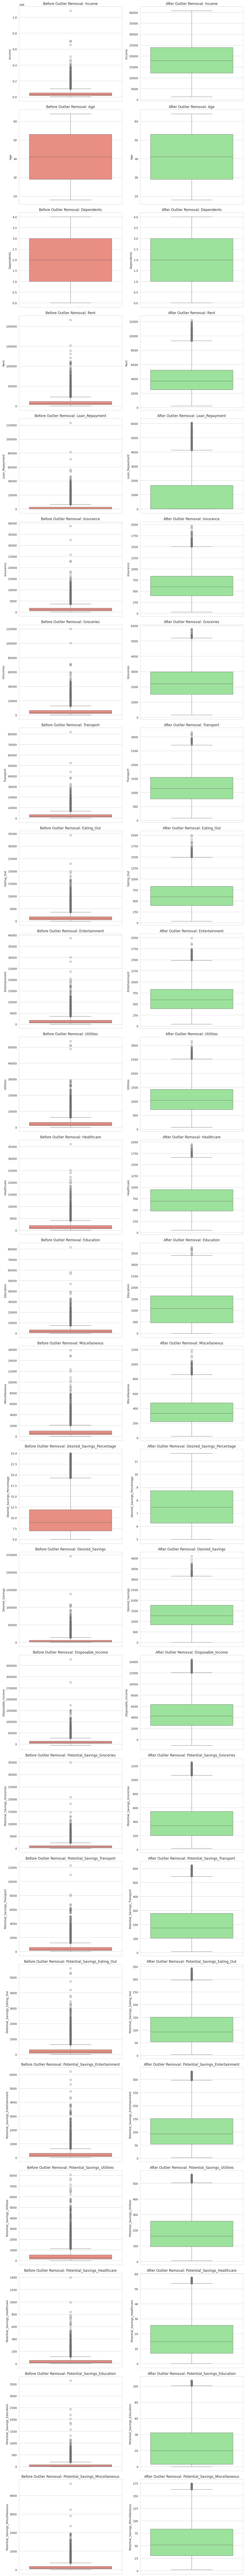

In [ ]:


# outlier removal function
def remove_outliers_iqr(df, columns, multiplier=1.5):
    print("\nHandling Outliers...")
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        initial_count = len(df_clean)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        removed = initial_count - len(df_clean)
        if removed > 0:
            print(f"   ✓ Removed {removed} outliers from {col}")
    return df_clean


# ---- Visualization Function ----
def visualize_outliers_before_after(df_original, df_cleaned, columns):
    """
    Compare boxplots before and after outlier removal.
    """
    num_cols = len(columns)
    plt.figure(figsize=(12, 5 * num_cols))

    for i, col in enumerate(columns, 1):
        # Before outlier removal
        plt.subplot(num_cols, 2, 2*i - 1)
        sns.boxplot(y=df_original[col], color='salmon')
        plt.title(f"Before Outlier Removal: {col}")

        # After outlier removal
        plt.subplot(num_cols, 2, 2*i)
        sns.boxplot(y=df_cleaned[col], color='lightgreen')
        plt.title(f"After Outlier Removal: {col}")

    plt.tight_layout()
    plt.show()


# ---- Example Usage ----
# Assuming df is your DataFrame and you want to check outliers in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Visualize before removal
print("Visualizing before and after outlier removal...")
df_cleaned = remove_outliers_iqr(df, numeric_cols)

# Show boxplots comparison
visualize_outliers_before_after(df, df_cleaned, numeric_cols)


In [ ]:
# Only remove outliers from expense columns, not from target
numerical_cols_for_outliers = [col for col in expense_columns if col != 'Disposable_Income']
if 'Income' in df_processed.columns:
    numerical_cols_for_outliers.append('Income')

df_processed = remove_outliers_iqr(df_processed, numerical_cols_for_outliers, multiplier=2.0)

print(f"\n    dataset shape after preprocessing: {df_processed.shape}")


Handling Outliers...
   ✓ Removed 883 outliers from Rent
   ✓ Removed 1163 outliers from Loan_Repayment
   ✓ Removed 581 outliers from Insurance
   ✓ Removed 228 outliers from Groceries
   ✓ Removed 115 outliers from Transport
   ✓ Removed 189 outliers from Eating_Out
   ✓ Removed 196 outliers from Entertainment
   ✓ Removed 104 outliers from Utilities
   ✓ Removed 52 outliers from Healthcare
   ✓ Removed 29 outliers from Education
   ✓ Removed 161 outliers from Miscellaneous
   ✓ Removed 1 outliers from Income

    dataset shape after preprocessing: (16298, 33)


In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16298 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Income                           16298 non-null  float64 
 1   Age                              16298 non-null  int64   
 2   Dependents                       16298 non-null  int64   
 3   Occupation                       16298 non-null  object  
 4   City_Tier                        16298 non-null  object  
 5   Rent                             16298 non-null  float64 
 6   Loan_Repayment                   16298 non-null  float64 
 7   Insurance                        16298 non-null  float64 
 8   Groceries                        16298 non-null  float64 
 9   Transport                        16298 non-null  float64 
 10  Eating_Out                       16298 non-null  float64 
 11  Entertainment                    16298 non-null  float64 
 12  Utilities

In [ ]:
#Disposable_Income = Income - Total_Expenses
#Potential_Savings = Money that COULD be saved from expenses
#potential savings are derived metrics, not independent features
columns_to_drop = [
    'Desired_Savings_Percentage',
    'Desired_Savings',
    'Potential_Savings_Groceries',
    'Potential_Savings_Transport',
    'Potential_Savings_Eating_Out',
    'Potential_Savings_Entertainment',
    'Potential_Savings_Utilities',
    'Potential_Savings_Healthcare',
    'Potential_Savings_Education',
    'Potential_Savings_Miscellaneous'
]

# Drop the columns and re-assign to the df_processed variable
df_processed = df_processed.drop(columns=columns_to_drop)



In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16298 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Income                   16298 non-null  float64 
 1   Age                      16298 non-null  int64   
 2   Dependents               16298 non-null  int64   
 3   Occupation               16298 non-null  object  
 4   City_Tier                16298 non-null  object  
 5   Rent                     16298 non-null  float64 
 6   Loan_Repayment           16298 non-null  float64 
 7   Insurance                16298 non-null  float64 
 8   Groceries                16298 non-null  float64 
 9   Transport                16298 non-null  float64 
 10  Eating_Out               16298 non-null  float64 
 11  Entertainment            16298 non-null  float64 
 12  Utilities                16298 non-null  float64 
 13  Healthcare               16298 non-null  float64 
 14  Education  

In [ ]:
print("\n" + "="*80)
print("PREPARING DATA FOR MODELING")
print("="*80)

# Identify target variable
target = 'Disposable_Income'

if target not in df_processed.columns:
    print(f"\n⚠️ Target variable '{target}' not found in dataset!")
    print("Available columns:", df_processed.columns.tolist())
    raise ValueError(f"Target variable '{target}' not found")

# Separate features and target
y = df_processed[target]

# Get ALL features except target (including categorical!)
feature_cols = [col for col in df_processed.columns if col != target]
X = df_processed[feature_cols]

# NOW identify which are categorical and which are numerical
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n✓ Features shape: {X.shape}")
print(f"✓ Target shape: {y.shape}")

print(f"\n📊 Feature Breakdown:")
print(f"   • Total features: {len(feature_cols)}")
print(f"   • Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"   • Numerical features ({len(numerical_features)}): {numerical_features}")

print(f"\n📋 All Features used ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    feat_type = "CAT" if col in categorical_features else "NUM"
    print(f"   {i}. [{feat_type}] {col}")


PREPARING DATA FOR MODELING

✓ Features shape: (16298, 22)
✓ Target shape: (16298,)

📊 Feature Breakdown:
   • Total features: 22
   • Categorical features (4): ['Occupation', 'City_Tier', 'Age_Group', 'Income_Bracket']
   • Numerical features (18): ['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Total_Expenses', 'Expense_to_Income_Ratio', 'Actual_Savings_Rate', 'Dependents_per_Income']

📋 All Features used (22):
   1. [NUM] Income
   2. [NUM] Age
   3. [NUM] Dependents
   4. [CAT] Occupation
   5. [CAT] City_Tier
   6. [NUM] Rent
   7. [NUM] Loan_Repayment
   8. [NUM] Insurance
   9. [NUM] Groceries
   10. [NUM] Transport
   11. [NUM] Eating_Out
   12. [NUM] Entertainment
   13. [NUM] Utilities
   14. [NUM] Healthcare
   15. [NUM] Education
   16. [NUM] Miscellaneous
   17. [NUM] Total_Expenses
   18. [NUM] Expense_to_Income_Ratio
   19. [NUM] Actu

In [ ]:
# ============================================================================
# 6. FEATURE SELECTION
# ============================================================================

print("\n" + "="*80)
print("FEATURE SELECTION")
print("="*80)

# Identify categorical and numerical features FIRST
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📊 Feature Types:")
print(f"   • Categorical ({len(categorical_features)}): {categorical_features}")
print(f"   • Numerical ({len(numerical_features)}): {numerical_features}")

# For feature selection, we'll temporarily encode categorical features
print("\n🔄 Temporarily encoding categorical features for feature selection...")
X_encoded = X.copy()
temp_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    temp_encoders[col] = le

print(f"   ✓ Encoded {len(categorical_features)} categorical features")

# Split data for feature selection
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Scale features (now all are numerical)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_fs)
X_test_scaled = scaler.transform(X_test_fs)

print(f"\n✓ Data prepared for feature selection:")
print(f"   • Training samples: {X_train_fs.shape[0]}")
print(f"   • Features: {X_train_fs.shape[1]}")

# Method 1: Univariate Feature Selection (F-statistic)
print("\n1️⃣ Univariate Feature Selection (F-statistic)...")
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X_train_scaled, y_train_fs)

f_scores = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'F_Score': selector_f.scores_,
    'Type': ['CAT' if col in categorical_features else 'NUM' for col in X.columns]
}).sort_values('F_Score', ascending=False)

print("\nTop 15 Features by F-Score:")
print(f_scores.head(15).to_string(index=False))

# Method 2: Mutual Information
print("\n2️⃣ Mutual Information Feature Selection...")
mi_scores = mutual_info_regression(X_train_scaled, y_train_fs, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'MI_Score': mi_scores,
    'Type': ['CAT' if col in categorical_features else 'NUM' for col in X.columns]
}).sort_values('MI_Score', ascending=False)

print("\nTop 15 Features by Mutual Information:")
print(mi_scores_df.head(15).to_string(index=False))

# Method 3: Random Forest Feature Importance
print("\n3️⃣ Random Forest Feature Importance...")
rf_importance = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_importance.fit(X_train_scaled, y_train_fs)

rf_importance_df = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'RF_Importance': rf_importance.feature_importances_,
    'Type': ['CAT' if col in categorical_features else 'NUM' for col in X.columns]
}).sort_values('RF_Importance', ascending=False)

print("\nTop 15 Features by Random Forest Importance:")
print(rf_importance_df.head(15).to_string(index=False))

# Method 4: Recursive Feature Elimination (RFE)
print("\n4️⃣ Recursive Feature Elimination (RFE)...")
from sklearn.linear_model import Ridge
estimator = Ridge(alpha=1.0)
rfe = RFE(estimator=estimator, n_features_to_select=15, step=1)
rfe.fit(X_train_scaled, y_train_fs)

rfe_features = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_,
    'Type': ['CAT' if col in categorical_features else 'NUM' for col in X.columns]
}).sort_values('Ranking')

print("\nTop 15 Features selected by RFE:")
print(rfe_features[rfe_features['Selected']].to_string(index=False))

# Combine all methods and select top features
print("\n5️⃣ Combining Feature Selection Methods...")

# Normalize scores to 0-1 range
f_scores['F_Score_Norm'] = (f_scores['F_Score'] - f_scores['F_Score'].min()) / (f_scores['F_Score'].max() - f_scores['F_Score'].min())
mi_scores_df['MI_Score_Norm'] = (mi_scores_df['MI_Score'] - mi_scores_df['MI_Score'].min()) / (mi_scores_df['MI_Score'].max() - mi_scores_df['MI_Score'].min())
rf_importance_df['RF_Importance_Norm'] = rf_importance_df['RF_Importance']

# Merge all scores
combined_scores = f_scores[['Feature', 'F_Score_Norm', 'Type']].copy()
combined_scores = combined_scores.merge(mi_scores_df[['Feature', 'MI_Score_Norm']], on='Feature')
combined_scores = combined_scores.merge(rf_importance_df[['Feature', 'RF_Importance_Norm']], on='Feature')

# Calculate average score
combined_scores['Avg_Score'] = combined_scores[['F_Score_Norm', 'MI_Score_Norm', 'RF_Importance_Norm']].mean(axis=1)
combined_scores = combined_scores.sort_values('Avg_Score', ascending=False)

print("\n📊 Combined Feature Rankings:")
print(combined_scores.head(20).to_string(index=False))

# Select top features
n_features_to_select = min(15, len(X.columns))
top_features = combined_scores.head(n_features_to_select)['Feature'].tolist()

print(f"\n✅ Selected Top {n_features_to_select} Features:")
for i, feat in enumerate(top_features, 1):
    feat_type = "CAT" if feat in categorical_features else "NUM"
    print(f"   {i:2d}. [{feat_type}] {feat}")


FEATURE SELECTION

📊 Feature Types:
   • Categorical (4): ['Occupation', 'City_Tier', 'Age_Group', 'Income_Bracket']
   • Numerical (18): ['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Total_Expenses', 'Expense_to_Income_Ratio', 'Actual_Savings_Rate', 'Dependents_per_Income']

🔄 Temporarily encoding categorical features for feature selection...
   ✓ Encoded 4 categorical features

✓ Data prepared for feature selection:
   • Training samples: 13038
   • Features: 22

1️⃣ Univariate Feature Selection (F-statistic)...

Top 15 Features by F-Score:
                Feature      F_Score Type
                 Income 29359.155546  NUM
              Groceries 21472.674674  NUM
              Transport 21411.568050  NUM
             Healthcare 20858.870032  NUM
              Utilities 16249.977957  NUM
             Eating_Out 13622.854190  NUM
          Entert

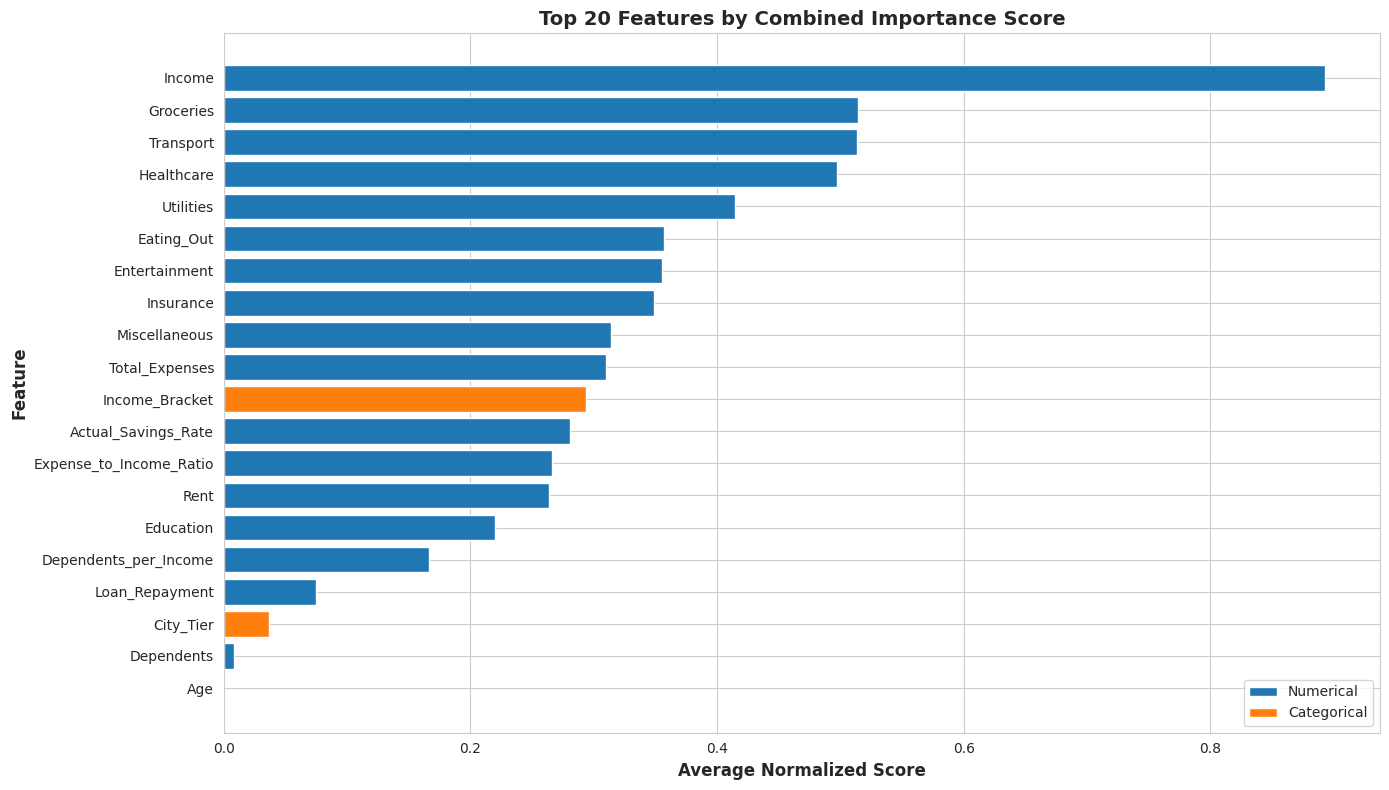


📋 Selected Feature Breakdown:
   • Categorical (1): ['Income_Bracket']
   • Numerical (14): ['Income', 'Groceries', 'Transport', 'Healthcare', 'Utilities', 'Eating_Out', 'Entertainment', 'Insurance', 'Miscellaneous', 'Total_Expenses', 'Actual_Savings_Rate', 'Expense_to_Income_Ratio', 'Rent', 'Education']


In [ ]:
# Visualize feature importance
plt.figure(figsize=(14, 8))
top_20 = combined_scores.head(20)
colors = ['#ff7f0e' if t == 'CAT' else '#1f77b4' for t in top_20['Type']]
plt.barh(range(len(top_20)), top_20['Avg_Score'], color=colors)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Average Normalized Score', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Top 20 Features by Combined Importance Score', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#1f77b4', label='Numerical'),
    Patch(facecolor='#ff7f0e', label='Categorical')
]
plt.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.show()

# Store categorical and numerical features from selected features
selected_categorical = [f for f in top_features if f in categorical_features]
selected_numerical = [f for f in top_features if f in numerical_features]

print(f"\n📋 Selected Feature Breakdown:")
print(f"   • Categorical ({len(selected_categorical)}): {selected_categorical}")
print(f"   • Numerical ({len(selected_numerical)}): {selected_numerical}")


In [ ]:
# ============================================================================
# 3. TRAIN-TEST SPLIT (BEFORE ENCODING!)
# ============================================================================

print(f"\n{'='*80}")
print("TRAIN-TEST SPLIT (Before Encoding)")
print(f"{'='*80}")

# Select only the top features from the original X dataframe
X_selected = X[top_features].copy() # Use .copy() to avoid SettingWithCopyWarning

# Convert categorical columns to 'object' dtype (strings) for pytorch-tabular initially
for col in selected_categorical:
    if col in X_selected.columns:
        X_selected[col] = X_selected[col].astype(str)
        print(f"   ✓ Converted '{col}' to 'object' dtype for initial split")

y_selected = y # y remains the same

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# --- Categorical Feature Handling AFTER Split ---
# Ensure categorical columns in test set only have categories present in train set
print("\n--- Handling Categorical Features After Split ---")
for col in selected_categorical:
    if col in X_train.columns and col in X_test.columns:
        train_categories = X_train[col].unique()
        print(f"   Processing '{col}': Found {len(train_categories)} categories in train set.")

        # Replace unseen categories in test set with a placeholder or NaN
        # Using the most frequent category in train as a simple imputation strategy
        test_unseen_mask = ~X_test[col].isin(train_categories)
        if test_unseen_mask.any():
            most_frequent_train_cat = X_train[col].mode()[0] # Get the most frequent category
            num_unseen = test_unseen_mask.sum()
            X_test.loc[test_unseen_mask, col] = most_frequent_train_cat # Replace unseen with most frequent
            print(f"   ✓ Replaced {num_unseen} unseen categories in test set '{col}' with '{most_frequent_train_cat}'")
        else:
             print(f"   ✓ No unseen categories found in test set '{col}'")

        # Convert to string dtype for pytorch-tabular (it handles encoding internally)
        # Don't use pd.Categorical as it causes the TypeError
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)
        print(f"   ✓ Converted '{col}' in train and test to string dtype for pytorch-tabular")

print(f"\n✓ Split completed:")
print(f"   • Train: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_selected)*100:.1f}%)")
print(f"   • Test:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X_selected)*100:.1f}%)")
print(f"\n   Target statistics:")
print(f"   • Train - Mean: ₹{y_train.mean():.2f}, Std: ₹{y_train.std():.2f}")
print(f"   • Test  - Mean: ₹{y_test.mean():.2f}, Std: ₹{y_test.std():.2f}")



TRAIN-TEST SPLIT (Before Encoding)
   ✓ Converted 'Income_Bracket' to 'object' dtype for initial split

--- Handling Categorical Features After Split ---
   Processing 'Income_Bracket': Found 5 categories in train set.
   ✓ No unseen categories found in test set 'Income_Bracket'
   ✓ Converted 'Income_Bracket' in train and test to string dtype for pytorch-tabular

✓ Split completed:
   • Train: 13038 samples (80.0%)
   • Test:  3260 samples (20.0%)

   Target statistics:
   • Train - Mean: ₹7339.70, Std: ₹5258.74
   • Test  - Mean: ₹7150.42, Std: ₹5151.07


In [ ]:
# 4. ENCODE CATEGORICAL VARIABLES (AFTER SPLIT!)
# ============================================================================

# print(f"\n{'='*80}")
# print("ENCODING CATEGORICAL VARIABLES")
# print(f"{'='*80}")

# label_encoders = {}
# categorical_cardinalities = {}

# X_train_processed = X_train.copy()
# X_test_processed = X_test.copy()

# if len(selected_categorical) > 0:
#     for col in selected_categorical:
#         print(f"\n🔄 Encoding: {col}")

#         le = LabelEncoder()

#         # Fit on training data only
#         X_train_processed[col] = le.fit_transform(X_train[col].astype(str))

#         # Transform test data (handle unseen categories)
#         def safe_transform(x, encoder):
#             try:
#                 return encoder.transform([str(x)])[0]
#             except ValueError:
#                 # Unseen category -> assign max_label + 1
#                 return len(encoder.classes_)

#         X_test_processed[col] = X_test[col].apply(lambda x: safe_transform(x, le))

#         # Store encoder and cardinality (+1 for unseen)
#         label_encoders[col] = le
#         categorical_cardinalities[col] = len(le.classes_) + 1

#         print(f"   ✓ Trained on {len(le.classes_)} categories")
#         print(f"   ✓ Total cardinality: {categorical_cardinalities[col]}")

#     print(f"\n✅ Encoded {len(selected_categorical)} categorical features")
# else:
#     print("\n⚠️ No categorical features to encode")

In [ ]:
# ============================================================================
# 4. CREATE DATAFRAMES WITH TARGET (NO MANUAL ENCODING NEEDED)
# ============================================================================

print(f"\n{'='*80}")
print("CREATING DATAFRAMES WITH TARGET")
print(f"{'='*80}")

# Create training DataFrame: Original features + Target
train_df = X_train.copy()  # Already has top_features from X_selected
train_df['Disposable_Income'] = y_train.values

# Create test DataFrame: Original features + Target
test_df = X_test.copy()  # Already has top_features from X_selected
test_df['Disposable_Income'] = y_test.values

print(f"\n✓ DataFrames created:")
print(f"   • train_df: {train_df.shape}")
print(f"   • test_df: {test_df.shape}")
print(f"   • Target column present: {'Disposable_Income' in train_df.columns}")

# Show column types
print(f"\n📊 Column Types in train_df:")
for col in selected_categorical[:3]:  # Show first 3 categorical
    if col in train_df.columns:
        print(f"   • {col}: {train_df[col].dtype} (sample: {train_df[col].iloc[0]})")



CREATING DATAFRAMES WITH TARGET

✓ DataFrames created:
   • train_df: (13038, 16)
   • test_df: (3260, 16)
   • Target column present: True

📊 Column Types in train_df:
   • Income_Bracket: object (sample: High)


In [ ]:
# ============================================================================
# 5. NORMALIZE TARGET VARIABLE
# ============================================================================

print(f"\n{'='*80}")
print("NORMALIZING TARGET VARIABLE")
print(f"{'='*80}")

from sklearn.preprocessing import StandardScaler

# Normalize target for better training
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Create scaled versions of the DataFrames
train_df_scaled = train_df.copy()
train_df_scaled['Disposable_Income'] = y_train_scaled

test_df_scaled = test_df.copy()
test_df_scaled['Disposable_Income'] = y_test_scaled

print(f"\n✓ Target normalized:")
print(f"   Original range: [₹{y_train.min():.2f}, ₹{y_train.max():.2f}]")
print(f"   Scaled range: [{y_train_scaled.min():.4f}, {y_train_scaled.max():.4f}]")
print(f"   Scaled mean: {y_train_scaled.mean():.4f}, Scaled std: {y_train_scaled.std():.4f}")

print(f"\n✓ DataFrames with scaled target:")
print(f"   • train_df_scaled: {train_df_scaled.shape}")
print(f"   • test_df_scaled: {test_df_scaled.shape}")



NORMALIZING TARGET VARIABLE

✓ Target normalized:
   Original range: [₹-1512.07, ₹38091.31]
   Scaled range: [-1.6833, 5.8479]
   Scaled mean: 0.0000, Scaled std: 1.0000

✓ DataFrames with scaled target:
   • train_df_scaled: (13038, 16)
   • test_df_scaled: (3260, 16)


In [ ]:
# ============================================================================
# 6. CONFIGURE TABTRANSFORMER MODEL
# ============================================================================

print(f"\n{'='*80}")
print("CONFIGURING TABTRANSFORMER MODEL")
print(f"{'='*80}")

from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models import TabTransformerConfig
from pytorch_tabular import TabularModel

print(f"\n📊 Feature Configuration:")
print(f"   • Total features: {len(top_features)}")
print(f"   • Categorical features: {len(selected_categorical)}")
print(f"   • Numerical features: {len(selected_numerical)}")

# Data Configuration
data_config = DataConfig(
    target=['Disposable_Income'],
    continuous_cols=selected_numerical,
    categorical_cols=selected_categorical,
)

print(f"\n✓ Data Config created:")
print(f"   • Target: {data_config.target}")
print(f"   • Continuous: {len(selected_numerical)} features")
print(f"   • Categorical: {len(selected_categorical)} features")

# Model Configuration (Improved hyperparameters)
model_config = TabTransformerConfig(
    task="regression",
    learning_rate=5e-4,  # Lower learning rate for stability
    input_embed_dim=32,
    num_heads=4,  # Reduced for simpler model
    num_attn_blocks=4,  # Reduced layers
    attn_dropout=0.2,  # Increased dropout
    add_norm_dropout=0.2,
    ff_dropout=0.2,
    transformer_activation="GEGLU",
)

print(f"\n✓ Model Config created:")
print(f"   • Task: Regression")
print(f"   • Learning rate: {model_config.learning_rate}")
print(f"   • Attention heads: {model_config.num_heads}")
print(f"   • Transformer blocks: {model_config.num_attn_blocks}")
print(f"   • Dropout: {model_config.attn_dropout}")

# Optimizer Configuration
optimizer_config = OptimizerConfig(
    optimizer="AdamW",
    lr_scheduler="ReduceLROnPlateau",
    lr_scheduler_params={
        "mode": "min",
        "patience": 3,
        "factor": 0.5,
        "min_lr": 1e-7
    }
)

print(f"\n✓ Optimizer Config created:")
print(f"   • Optimizer: {optimizer_config.optimizer}")
print(f"   • LR Scheduler: {optimizer_config.lr_scheduler}")

# Trainer Configuration
trainer_config = TrainerConfig(
    batch_size=64,  # Smaller batch size
    max_epochs=100,
    early_stopping="valid_loss",
    early_stopping_patience=15,
    checkpoints=None,  # Disabled to avoid UnpicklingError
    load_best=False,
    progress_bar="simple",
)

print(f"\n✓ Trainer Config created:")
print(f"   • Batch size: {trainer_config.batch_size}")
print(f"   • Max epochs: {trainer_config.max_epochs}")
print(f"   • Early stopping patience: {trainer_config.early_stopping_patience}")



CONFIGURING TABTRANSFORMER MODEL

📊 Feature Configuration:
   • Total features: 15
   • Categorical features: 1
   • Numerical features: 14

✓ Data Config created:
   • Target: ['Disposable_Income']
   • Continuous: 14 features
   • Categorical: 1 features

✓ Model Config created:
   • Task: Regression
   • Learning rate: 0.0005
   • Attention heads: 4
   • Transformer blocks: 4
   • Dropout: 0.2

✓ Optimizer Config created:
   • Optimizer: AdamW
   • LR Scheduler: ReduceLROnPlateau

✓ Trainer Config created:
   • Batch size: 64
   • Max epochs: 100
   • Early stopping patience: 15


In [ ]:
# ============================================================================
# 7. INITIALIZE AND TRAIN MODEL
# ============================================================================

print(f"\n{'='*80}")
print("INITIALIZING TABTRANSFORMER MODEL")
print(f"{'='*80}")

# Initialize model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

print(f"\n✅ Model initialized successfully!")

print(f"\n{'='*80}")
print("TRAINING TABTRANSFORMER MODEL")
print(f"{'='*80}")
print(f"\n🚀 Starting training with normalized target...\n")

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off



INITIALIZING TABTRANSFORMER MODEL

✅ Model initialized successfully!

TRAINING TABTRANSFORMER MODEL

🚀 Starting training with normalized target...



In [ ]:
import torch
import warnings

# Fix for PyTorch 2.6+ weights_only security feature
# Add safe globals before training
try:
    import omegaconf
    from omegaconf import DictConfig, ContainerMetadata

    torch.serialization.add_safe_globals([omegaconf.DictConfig])
    print("✅ Added safe globals for model checkpointing")
except ImportError:
    warnings.warn("⚠️ omegaconf not found, install it using 'pip install omegaconf'")


In [ ]:
# Train the model
tabular_model.fit(train=train_df_scaled, validation=test_df_scaled)

print(f"\n{'='*80}")
print("✅ TRAINING COMPLETED!")
print(f"{'='*80}")

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type                   | Params
------------------------------------------------------------
0 | _backbone        | TabTransformerBackbone

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_tabular.tabular_model:Training the model completed



✅ TRAINING COMPLETED!


In [ ]:
# ============================================================================
# 8. MAKE PREDICTIONS AND EVALUATE
# ============================================================================

print(f"\n{'='*80}")
print("GENERATING PREDICTIONS")
print(f"{'='*80}")

# Get predictions (scaled)
train_predictions = tabular_model.predict(train_df_scaled)
test_predictions = tabular_model.predict(test_df_scaled)

y_train_pred_scaled = train_predictions['Disposable_Income_prediction'].values
y_test_pred_scaled = test_predictions['Disposable_Income_prediction'].values

# Inverse transform to original scale
y_train_pred = target_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

print(f"\n✓ Predictions generated and transformed back to original scale")

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"\n{'='*80}")
print("MODEL EVALUATION")
print(f"{'='*80}")

print(f"\n📊 TRAINING SET PERFORMANCE:")
print(f"   ┌─────────────────────────────┐")
print(f"   │ R² Score:  {train_r2:>15.4f} │")
print(f"   │ RMSE:      ₹{train_rmse:>14,.2f} │")
print(f"   │ MAE:       ₹{train_mae:>14,.2f} │")
print(f"   │ MAPE:      {train_mape:>14.2f}% │")
print(f"   └─────────────────────────────┘")

print(f"\n📊 TEST SET PERFORMANCE:")
print(f"   ┌─────────────────────────────┐")
print(f"   │ R² Score:  {test_r2:>15.4f} │")
print(f"   │ RMSE:      ₹{test_rmse:>14,.2f} │")
print(f"   │ MAE:       ₹{test_mae:>14,.2f} │")
print(f"   │ MAPE:      {test_mape:>14.2f}% │")
print(f"   └─────────────────────────────┘")

# Performance assessment
if test_r2 > 0.5:
    print(f"\n🎉 EXCELLENT! R² = {test_r2:.4f}")
elif test_r2 > 0.3:
    print(f"\n✓ GOOD! R² = {test_r2:.4f}")
elif test_r2 > 0:
    print(f"\n⚠️ FAIR - R² = {test_r2:.4f}")
else:
    print(f"\n❌ POOR - R² = {test_r2:.4f}")

# Overfitting check
r2_diff = abs(train_r2 - test_r2)
print(f"\n🔍 Generalization Analysis:")
if r2_diff < 0.05:
    print(f"   ✅ EXCELLENT (Δ R² = {r2_diff:.4f})")
elif r2_diff < 0.10:
    print(f"   ✓ GOOD (Δ R² = {r2_diff:.4f})")
else:
    print(f"   ⚠️ Overfitting detected (Δ R² = {r2_diff:.4f})")



GENERATING PREDICTIONS

✓ Predictions generated and transformed back to original scale

MODEL EVALUATION

📊 TRAINING SET PERFORMANCE:
   ┌─────────────────────────────┐
   │ R² Score:           0.9839 │
   │ RMSE:      ₹        667.26 │
   │ MAE:       ₹        487.69 │
   │ MAPE:               46.01% │
   └─────────────────────────────┘

📊 TEST SET PERFORMANCE:
   ┌─────────────────────────────┐
   │ R² Score:           0.9836 │
   │ RMSE:      ₹        659.08 │
   │ MAE:       ₹        480.12 │
   │ MAPE:               28.77% │
   └─────────────────────────────┘

🎉 EXCELLENT! R² = 0.9836

🔍 Generalization Analysis:
   ✅ EXCELLENT (Δ R² = 0.0003)


In [ ]:
# ============================================================================
# DYNAMIC WEIGHTS PORTFOLIO ALLOCATION SYSTEM
# User-Controllable Weights & Allocation Bias
# ============================================================================

import numpy as np
import pandas as pd
import pickle
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print(f"\n{'='*80}")
print("DYNAMIC WEIGHTS PORTFOLIO ALLOCATION SYSTEM")
print("User-Controllable Risk Weights & Asset Bias")
print(f"{'='*80}")



DYNAMIC WEIGHTS PORTFOLIO ALLOCATION SYSTEM
User-Controllable Risk Weights & Asset Bias


In [ ]:
# ============================================================================
# ENHANCED RISK PROFILING WITH USER-DEFINED WEIGHTS
# ============================================================================

def calculate_risk_profile(age, income, savings_ratio, dependents, weights=None):
    """
    Calculate risk profile with USER-DEFINED WEIGHTS

    Parameters:
    -----------
    age : float
        Age of the person
    income : float
        Income amount
    savings_ratio : float
        Savings as ratio of income
    dependents : int
        Number of dependents
    weights : dict, optional
        Custom weights for risk factors
        Default: {'age': 0.4, 'income': 0.3, 'savings': 0.2, 'dependents': 0.1}

    Returns:
    --------
    float : Risk score (0-100)
    """

    # Default weights if user doesn't provide
    if weights is None:
        weights = {
            'age': 0.4,
            'income': 0.3,
            'savings': 0.2,
            'dependents': 0.1
        }

    # Normalize weights so they sum to 1
    total_weight = sum(weights.values())
    weights = {k: v / total_weight for k, v in weights.items()}

    # Calculate normalized factors
    age_factor = max(0, (60 - age) / 40) * 100  # Younger = higher risk
    income_factor = min(1, income / 100000) * 100  # Higher income = more capacity
    savings_factor = min(1, savings_ratio) * 100  # Higher savings = more stability
    dependents_factor = max(0, (5 - dependents) / 5) * 100  # Fewer dependents = more freedom

    # Weighted composite risk score
    risk_score = (
        weights['age'] * age_factor +
        weights['income'] * income_factor +
        weights['savings'] * savings_factor +
        weights['dependents'] * dependents_factor
    )

    return min(100, max(0, risk_score))
#“Given a person’s age, income, savings, and dependents — and how much importance the user assigns to each — how risk-tolerant is this person?”

In [ ]:
# ============================================================================
# ENHANCED PORTFOLIO ALLOCATION WITH BIAS PARAMETERS
# ============================================================================

def generate_portfolio_allocation_with_bias(
    risk_score,
    equity_bias=1.0,
    debt_bias=1.0,
    gold_bias=1.0,
    emergency_bias=1.0
):
    """
    Generate portfolio allocation with USER-CONTROLLABLE BIAS

    Parameters:
    -----------
    risk_score : float
        Risk score (0-100)
    equity_bias : float
        Multiplier for equity allocation (default: 1.0)
        > 1.0 increases equity, < 1.0 decreases
    debt_bias : float
        Multiplier for debt allocation
    gold_bias : float
        Multiplier for gold allocation
        Example: 1.2 = 20% increase if gold is trending
    emergency_bias : float
        Multiplier for emergency fund allocation

    Returns:
    --------
    list : [Equity%, Debt%, Gold%, Emergency%] (normalized to 100%)
    """

    # Base allocation based on risk score
    if risk_score < 20:
        base_allocation = [10, 50, 20, 20]
    elif risk_score < 35:
        base_allocation = [20, 45, 20, 15]
    elif risk_score < 50:
        base_allocation = [30, 40, 15, 15]
    elif risk_score < 65:
        base_allocation = [45, 30, 15, 10]
    elif risk_score < 80:
        base_allocation = [60, 20, 10, 10]
    else:
        base_allocation = [75, 10, 10, 5]

    # Apply user bias
    biased_allocation = [
        base_allocation[0] * equity_bias,
        base_allocation[1] * debt_bias,
        base_allocation[2] * gold_bias,
        base_allocation[3] * emergency_bias
    ]

    # Normalize to sum to 100%
    total = sum(biased_allocation)
    normalized_allocation = [(x / total) * 100 for x in biased_allocation]

    return normalized_allocation



    #allows you to create a flexible, customizable investment allocation system based on both:
    #The user’s risk profile, and


    #Their personal or market-based bias (for example, “gold is doing well — increase gold allocation”).

In [ ]:
# ============================================================================
# PREPARE TRAINING DATA WITH DYNAMIC ALLOCATIONS
# ============================================================================

print(f"\n{'='*80}")
print("PREPARING TRAINING DATA WITH DYNAMIC ALLOCATIONS")
print(f"{'='*80}")

# Use existing data
training_data = pd.concat([train_df.copy(), test_df.copy()], axis=0, ignore_index=True)
all_predictions = np.concatenate([y_train_pred, y_test_pred])
training_data['Predicted_Disposable_Income'] = all_predictions

# Calculate risk profiles with default weights
risk_scores = []
for idx, row in training_data.iterrows():
    age = row.get('Age', 35)

    income = row['Predicted_Disposable_Income']
    savings_ratio = 0.3
    dependents = row.get('Number_of_Dependents', 0)

    risk_score = calculate_risk_profile(age, income, savings_ratio, dependents)
    risk_scores.append(risk_score)

training_data['Risk_Score'] = risk_scores

# Generate allocations (using default bias for training)
allocations = []
for risk_score in risk_scores:
    alloc = generate_portfolio_allocation_with_bias(risk_score)
    allocations.append(alloc)

allocation_df = pd.DataFrame(allocations, columns=[
    'Allocation_Equity',
    'Allocation_Debt',
    'Allocation_Gold',
    'Allocation_Emergency'
])

training_data = pd.concat([training_data, allocation_df], axis=1)

print(f"\n✓ Training data prepared with dynamic allocations")
print(f"   • Samples: {len(training_data):,}")
print(f"   • Default weights used for training")



PREPARING TRAINING DATA WITH DYNAMIC ALLOCATIONS

✓ Training data prepared with dynamic allocations
   • Samples: 16,298
   • Default weights used for training


In [ ]:
# ============================================================================
# TRAIN INVESTMENT MODEL (Same as before)
# ============================================================================

print(f"\n{'='*80}")
print("TRAINING INVESTMENT MODEL")
print(f"{'='*80}")

from sklearn.model_selection import train_test_split

# Feature columns
feature_columns = ['Predicted_Disposable_Income', 'Risk_Score']
if 'Age' in training_data.columns:
    feature_columns.append('Age')
if 'Number_of_Dependents' in training_data.columns:
    feature_columns.append('Number_of_Dependents')

X_investment = training_data[feature_columns].fillna(training_data[feature_columns].mean())
y_investment = training_data[[
    'Allocation_Equity',
    'Allocation_Debt',
    'Allocation_Gold',
    'Allocation_Emergency'
]].values

# Split
X_train_inv, X_test_inv, y_train_inv, y_test_inv = train_test_split(
    X_investment, y_investment, test_size=0.2, random_state=42
)

# Scale
inv_scaler = StandardScaler()
X_train_inv_scaled = inv_scaler.fit_transform(X_train_inv)
X_test_inv_scaled = inv_scaler.transform(X_test_inv)

# Train
base_rf = RandomForestRegressor(
    n_estimators=200, max_depth=15, random_state=42, n_jobs=-1
)
investment_model = MultiOutputRegressor(base_rf)
investment_model.fit(X_train_inv_scaled, y_train_inv)

print(f"\n✓ Investment model trained")


TRAINING INVESTMENT MODEL

✓ Investment model trained



CREATING ENHANCED ADVISOR FUNCTION

✅ Enhanced advisor function created: financial_advisor_dynamic()

CHECKING DEPENDENCIES

✅ All required objects are available

DEMONSTRATION: USER-CONTROLLED SCENARIOS

────────────────────────────────────────────────────────────────────────────────
📊 Scenario 1: DEFAULT RECOMMENDATION
────────────────────────────────────────────────────────────────────────────────

   [DEBUG] Starting recommendation generation...
   [DEBUG] Estimating expense breakdown...
   [DEBUG] Building feature vector...
   [DEBUG] Available columns: ['Age', 'Income', 'Monthly_Expenses', 'Monthly_Savings', 'Number_of_Dependents', 'Occupation', 'Education_Level', 'City_Tier', 'Employment_Status', 'Groceries', 'Transport', 'Healthcare', 'Rent', 'Utilities', 'Eating_Out', 'Entertainment', 'Insurance', 'Education', 'Miscellaneous', 'Total_Expenses', 'Income_Bracket', 'Actual_Savings_Rate', 'Expense_to_Income_Ratio']
   [DEBUG] Required features: ['Income', 'Groceries', 'Transport'

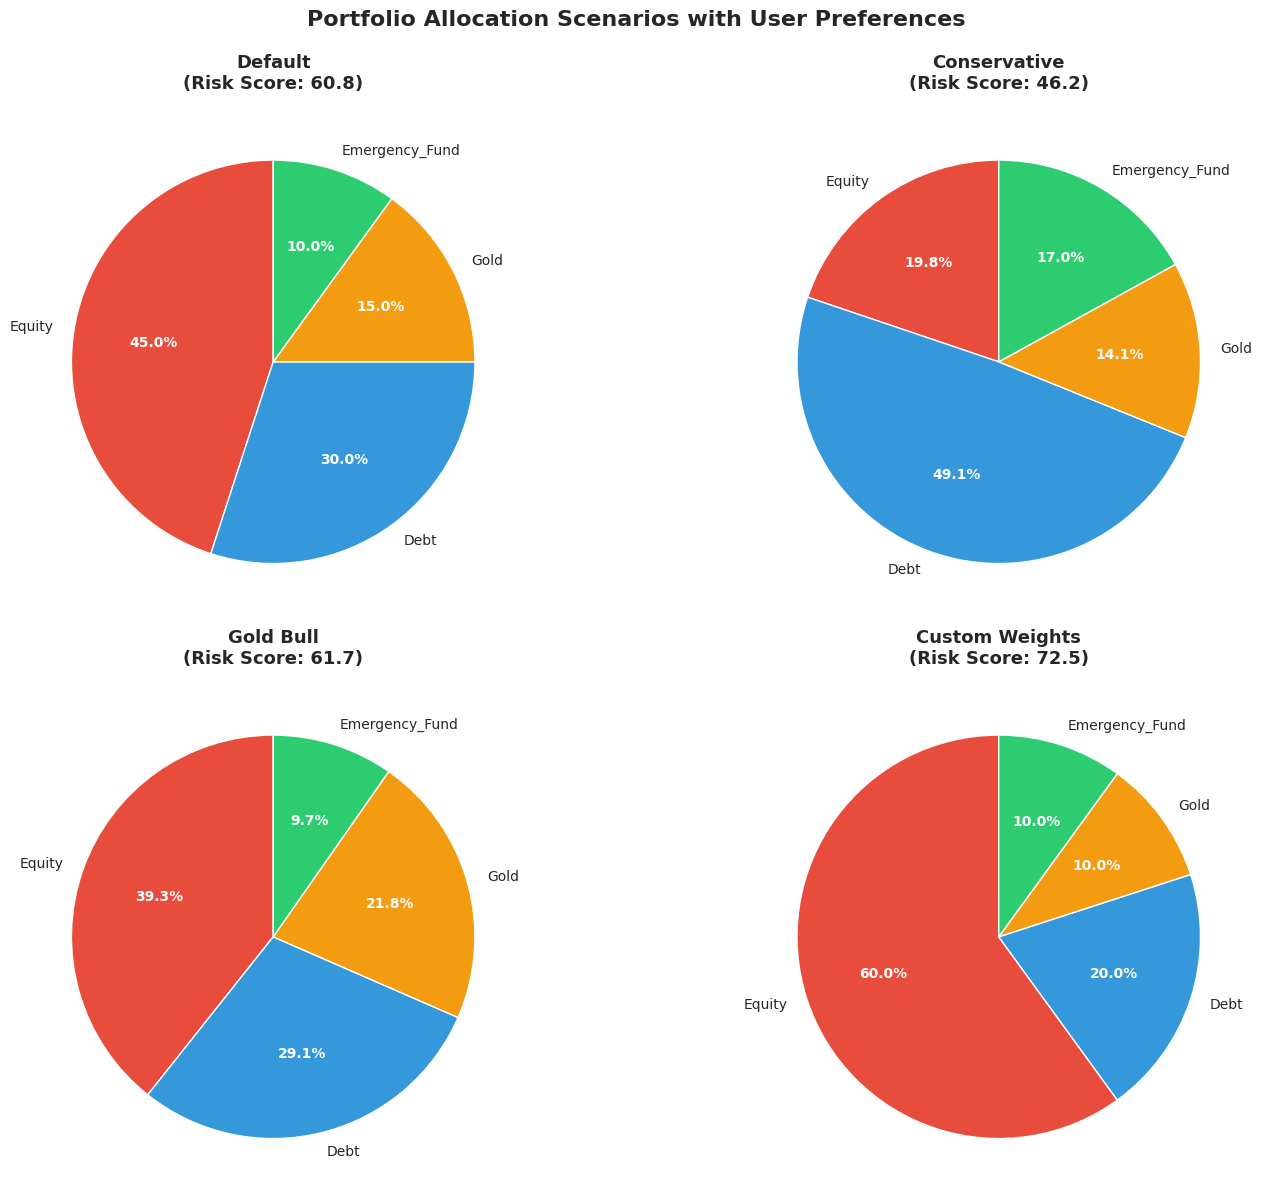


✓ Visualization created with 4 scenarios!


In [ ]:
# ============================================================================
# ENHANCED FINANCIAL ADVISOR WITH USER CONTROLS - COMPLETE FIX
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Optional

print(f"\n{'='*80}")
print("CREATING ENHANCED ADVISOR FUNCTION")
print(f"{'='*80}")

def financial_advisor_dynamic(
    age,
    income,
    monthly_expenses,
    monthly_savings,
    dependents=0,
    # User-controllable risk weights
    risk_weights=None,
    # User-controllable asset bias
    equity_bias=1.0,
    debt_bias=1.0,
    gold_bias=1.0,
    emergency_bias=1.0,
    # Investment percentage
    investment_percentage=0.30,
    # Additional features
    occupation='Professional',
    education='Bachelor',
    city_tier='Tier 1',
    employment_status='Full-time',
    # Optional: Detailed expense breakdown (will be estimated if not provided)
    groceries=None,
    transport=None,
    healthcare=None,
    rent=None,
    utilities=None,
    eating_out=None,
    entertainment=None,
    insurance=None,
    education_expense=None,
    miscellaneous=None
):
    """
    ENHANCED FINANCIAL ADVISOR WITH FULL USER CONTROL

    Parameters:
    -----------
    age, income, monthly_expenses, monthly_savings, dependents : Required inputs

    risk_weights : dict, optional
        Custom weights for risk calculation
        Example: {'age': 0.5, 'income': 0.3, 'savings': 0.1, 'dependents': 0.1}

    equity_bias, debt_bias, gold_bias, emergency_bias : float, optional
        Multipliers for asset allocation (default: 1.0)

    investment_percentage : float, optional
        Percentage of disposable income to invest (default: 0.30 = 30%)

    groceries, transport, etc : float, optional
        Detailed expense breakdown. If not provided, will be estimated from monthly_expenses

    Returns:
    --------
    dict : Complete recommendation with all parameters used
    """

    try:
        print(f"\n   [DEBUG] Starting recommendation generation...")

        # Check if required objects exist
        required_objects = {
            'tabular_model': globals().get('tabular_model'),
            'target_scaler': globals().get('target_scaler'),
            'top_features': globals().get('top_features'),
            'calculate_risk_profile': globals().get('calculate_risk_profile'),
            'generate_portfolio_allocation_with_bias': globals().get('generate_portfolio_allocation_with_bias'),
            'investment_model': globals().get('investment_model'),
            'inv_scaler': globals().get('inv_scaler'),
            'feature_columns': globals().get('feature_columns')
        }

        missing = [name for name, obj in required_objects.items() if obj is None]

        if missing:
            return {
                'error': 'Missing required dependencies',
                'missing_objects': missing,
                'message': f'Please define the following objects first: {", ".join(missing)}'
            }

        print(f"   [DEBUG] Estimating expense breakdown...")

        # If detailed expenses not provided, estimate them as percentages of total expenses
        # These are typical budget percentages
        if groceries is None:
            groceries = monthly_expenses * 0.25  # 25% on groceries
        if rent is None:
            rent = monthly_expenses * 0.30  # 30% on rent
        if transport is None:
            transport = monthly_expenses * 0.10  # 10% on transport
        if utilities is None:
            utilities = monthly_expenses * 0.08  # 8% on utilities
        if healthcare is None:
            healthcare = monthly_expenses * 0.05  # 5% on healthcare
        if eating_out is None:
            eating_out = monthly_expenses * 0.08  # 8% on eating out
        if entertainment is None:
            entertainment = monthly_expenses * 0.05  # 5% on entertainment
        if insurance is None:
            insurance = monthly_expenses * 0.04  # 4% on insurance
        if education_expense is None:
            education_expense = monthly_expenses * 0.03  # 3% on education
        if miscellaneous is None:
            miscellaneous = monthly_expenses * 0.02  # 2% miscellaneous

        # Calculate derived features
        total_expenses = monthly_expenses
        actual_savings_rate = (monthly_savings / income * 100) if income > 0 else 0
        expense_to_income_ratio = (monthly_expenses / income) if income > 0 else 0

        # Determine income bracket
        if income < 30000:
            income_bracket = 'Low'
        elif income < 60000:
            income_bracket = 'Medium'
        elif income < 100000:
            income_bracket = 'High'
        else:
            income_bracket = 'Very High'

        print(f"   [DEBUG] Building feature vector...")

        # Build complete feature vector with all required features
        user_features = pd.DataFrame([{
            'Age': age,
            'Income': income,
            'Monthly_Expenses': monthly_expenses,
            'Monthly_Savings': monthly_savings,
            'Number_of_Dependents': dependents,
            'Occupation': occupation,
            'Education_Level': education,
            'City_Tier': city_tier,
            'Employment_Status': employment_status,
            # Detailed expenses
            'Groceries': groceries,
            'Transport': transport,
            'Healthcare': healthcare,
            'Rent': rent,
            'Utilities': utilities,
            'Eating_Out': eating_out,
            'Entertainment': entertainment,
            'Insurance': insurance,
            'Education': education_expense,
            'Miscellaneous': miscellaneous,
            # Derived features
            'Total_Expenses': total_expenses,
            'Income_Bracket': income_bracket,
            'Actual_Savings_Rate': actual_savings_rate,
            'Expense_to_Income_Ratio': expense_to_income_ratio
        }])

        print(f"   [DEBUG] Available columns: {list(user_features.columns)}")
        print(f"   [DEBUG] Required features: {top_features}")

        # Check if all required features are present
        missing_features = [f for f in top_features if f not in user_features.columns]
        if missing_features:
            return {
                'error': 'Missing features',
                'missing_features': missing_features,
                'available_features': list(user_features.columns),
                'message': f'Required features not in DataFrame: {missing_features}'
            }

        # Predict disposable income
        user_features_selected = user_features[top_features].copy()

        print(f"   [DEBUG] Predicting disposable income...")
        disposable_income_scaled = tabular_model.predict(user_features_selected)

        print(f"   [DEBUG] Inverse transforming prediction...")
        disposable_income = target_scaler.inverse_transform(
            disposable_income_scaled['Disposable_Income_prediction'].values.reshape(-1, 1)
        )[0][0]

        print(f"   [DEBUG] Predicted disposable income: ₹{disposable_income:,.2f}")

        # Calculate risk profile with CUSTOM WEIGHTS
        print(f"   [DEBUG] Calculating risk profile...")
        savings_ratio = monthly_savings / income if income > 0 else 0
        risk_score = calculate_risk_profile(
            age, income, savings_ratio, dependents,
            weights=risk_weights
        )

        print(f"   [DEBUG] Risk score: {risk_score:.2f}")

        # Generate allocation with CUSTOM BIAS
        print(f"   [DEBUG] Generating portfolio allocation with bias...")
        allocation_with_bias = generate_portfolio_allocation_with_bias(
            risk_score,
            equity_bias=equity_bias,
            debt_bias=debt_bias,
            gold_bias=gold_bias,
            emergency_bias=emergency_bias
        )

        print(f"   [DEBUG] Allocation with bias: {allocation_with_bias}")

        # Also get ML model prediction (for comparison)
        print(f"   [DEBUG] Getting ML model prediction...")
        investment_features = pd.DataFrame([{
            'Predicted_Disposable_Income': disposable_income,
            'Risk_Score': risk_score,
            'Age': age,
            'Number_of_Dependents': dependents
        }])

        # Check if all required columns are present
        missing_inv_features = [f for f in feature_columns if f not in investment_features.columns]
        if missing_inv_features:
            return {
                'error': 'Missing investment features',
                'missing_features': missing_inv_features,
                'available_features': list(investment_features.columns),
                'message': f'Required investment features not in DataFrame: {missing_inv_features}'
            }

        investment_features = investment_features[feature_columns]

        investment_features_scaled = inv_scaler.transform(investment_features)
        ml_allocation = investment_model.predict(investment_features_scaled)[0]

        # Normalize ML allocation
        ml_allocation = (ml_allocation / ml_allocation.sum()) * 100

        print(f"   [DEBUG] ML allocation: {ml_allocation}")

        # Calculate investment amounts
        monthly_investment = disposable_income * investment_percentage

        print(f"   [DEBUG] Building response dictionary...")

        # Build response
        response = {
            'Input_Parameters': {
                'Age': age,
                'Income': income,
                'Monthly_Expenses': monthly_expenses,
                'Monthly_Savings': monthly_savings,
                'Dependents': dependents,
                'Risk_Weights_Used': risk_weights if risk_weights else {
                    'age': 0.4, 'income': 0.3, 'savings': 0.2, 'dependents': 0.1
                },
                'Asset_Bias_Applied': {
                    'Equity': equity_bias,
                    'Debt': debt_bias,
                    'Gold': gold_bias,
                    'Emergency': emergency_bias
                },
                'Investment_Percentage': investment_percentage * 100,
                'Expense_Breakdown_Estimated': all([
                    groceries is None, transport is None, healthcare is None
                ])
            },
            'Predictions': {
                'Disposable_Income': round(float(disposable_income), 2),
                'Risk_Score': round(float(risk_score), 2)
            },
            'Portfolio_With_User_Preferences': {
                'Monthly_Investment': round(float(monthly_investment), 2),
                'Allocation_%': {
                    'Equity': round(float(allocation_with_bias[0]), 2),
                    'Debt': round(float(allocation_with_bias[1]), 2),
                    'Gold': round(float(allocation_with_bias[2]), 2),
                    'Emergency_Fund': round(float(allocation_with_bias[3]), 2)
                },
                'Allocation_Amount': {
                    'Equity': round(float(monthly_investment * allocation_with_bias[0] / 100), 2),
                    'Debt': round(float(monthly_investment * allocation_with_bias[1] / 100), 2),
                    'Gold': round(float(monthly_investment * allocation_with_bias[2] / 100), 2),
                    'Emergency_Fund': round(float(monthly_investment * allocation_with_bias[3] / 100), 2)
                }
            },
            'ML_Model_Recommendation': {
                'Allocation_%': {
                    'Equity': round(float(ml_allocation[0]), 2),
                    'Debt': round(float(ml_allocation[1]), 2),
                    'Gold': round(float(ml_allocation[2]), 2),
                    'Emergency_Fund': round(float(ml_allocation[3]), 2)
                }
            },
            'Notes': {
                'user_preferences_applied': bool(
                    risk_weights or
                    equity_bias != 1.0 or
                    debt_bias != 1.0 or
                    gold_bias != 1.0 or
                    emergency_bias != 1.0
                ),
                'bias_explanation': (
                    "Bias > 1.0 increases allocation, < 1.0 decreases. "
                    "Final allocation is normalized to 100%."
                )
            }
        }

        print(f"   [DEBUG] ✓ Recommendation generated successfully!")

        return response

    except Exception as e:
        import traceback
        error_trace = traceback.format_exc()
        print(f"\n   [ERROR] Exception occurred:")
        print(f"   {str(e)}")
        print(f"\n   Full traceback:")
        print(error_trace)

        return {
            'error': str(e),
            'traceback': error_trace,
            'message': 'Unable to generate recommendation'
        }

print(f"\n✅ Enhanced advisor function created: financial_advisor_dynamic()")

# ============================================================================
# DEPENDENCY CHECK
# ============================================================================

print(f"\n{'='*80}")
print("CHECKING DEPENDENCIES")
print(f"{'='*80}")

required_objects = [
    'tabular_model', 'target_scaler', 'top_features',
    'calculate_risk_profile', 'generate_portfolio_allocation_with_bias',
    'investment_model', 'inv_scaler', 'feature_columns'
]

missing_objects = [obj for obj in required_objects if obj not in globals()]

if missing_objects:
    print(f"\n❌ ERROR: Missing required objects:")
    for obj in missing_objects:
        print(f"   - {obj}")
    print(f"\n⚠️  Please run the previous cells that define these objects first!")
else:
    print(f"\n✅ All required objects are available")
    print(f"\n{'='*80}")
    print("DEMONSTRATION: USER-CONTROLLED SCENARIOS")
    print(f"{'='*80}")

    # Scenario 1: Default (No customization)
    print(f"\n{'─'*80}")
    print(f"📊 Scenario 1: DEFAULT RECOMMENDATION")
    print(f"{'─'*80}")

    rec1 = financial_advisor_dynamic(
        age=35,
        income=75000,
        monthly_expenses=45000,
        monthly_savings=20000,
        dependents=1
    )

    # Check if recommendation was successful
    if 'error' in rec1:
        print(f"\n❌ Error generating recommendation:")
        print(f"   {rec1['message']}")
    else:
        print(f"\n   User: Moderate investor, no preferences")
        print(f"   Risk Score: {rec1['Predictions']['Risk_Score']:.2f}")
        print(f"   Disposable Income: ₹{rec1['Predictions']['Disposable_Income']:,.2f}")
        print(f"\n   Portfolio Allocation:")
        for asset, pct in rec1['Portfolio_With_User_Preferences']['Allocation_%'].items():
            amount = rec1['Portfolio_With_User_Preferences']['Allocation_Amount'][asset]
            print(f"      {asset:15s}: {pct:5.1f}% (₹{amount:8,.2f})")

    # Only continue if first scenario was successful
    if 'error' not in rec1:
        # Scenario 2: Conservative user
        print(f"\n{'─'*80}")
        print(f"📊 Scenario 2: CONSERVATIVE USER (Prefers Safety)")
        print(f"{'─'*80}")

        rec2 = financial_advisor_dynamic(
            age=50,
            income=80000,
            monthly_expenses=50000,
            monthly_savings=25000,
            dependents=2,
            equity_bias=0.7,
            debt_bias=1.3,
            emergency_bias=1.2
        )

        if 'error' not in rec2:
            print(f"\n   User: Conservative, prefers safety")
            print(f"   Bias Applied: Equity ↓30%, Debt ↑30%, Emergency ↑20%")
            print(f"   Risk Score: {rec2['Predictions']['Risk_Score']:.2f}")
            print(f"\n   Portfolio Allocation:")
            for asset, pct in rec2['Portfolio_With_User_Preferences']['Allocation_%'].items():
                amount = rec2['Portfolio_With_User_Preferences']['Allocation_Amount'][asset]
                print(f"      {asset:15s}: {pct:5.1f}% (₹{amount:8,.2f})")

        # Scenario 3: Gold bull
        print(f"\n{'─'*80}")
        print(f"📊 Scenario 3: GOLD BULL (Expects Gold Rally)")
        print(f"{'─'*80}")

        rec3 = financial_advisor_dynamic(
            age=40,
            income=90000,
            monthly_expenses=55000,
            monthly_savings=30000,
            dependents=1,
            gold_bias=1.5,
            equity_bias=0.9
        )

        if 'error' not in rec3:
            print(f"\n   User: Expects gold to outperform")
            print(f"   Bias Applied: Gold ↑50%, Equity ↓10%")
            print(f"   Risk Score: {rec3['Predictions']['Risk_Score']:.2f}")
            print(f"\n   Portfolio Allocation:")
            for asset, pct in rec3['Portfolio_With_User_Preferences']['Allocation_%'].items():
                amount = rec3['Portfolio_With_User_Preferences']['Allocation_Amount'][asset]
                print(f"      {asset:15s}: {pct:5.1f}% (₹{amount:8,.2f})")

        # Scenario 4: Custom risk weights
        print(f"\n{'─'*80}")
        print(f"📊 Scenario 4: CUSTOM RISK WEIGHTS (Age Priority)")
        print(f"{'─'*80}")

        custom_weights = {
            'age': 0.6,
            'income': 0.2,
            'savings': 0.1,
            'dependents': 0.1
        }

        rec4 = financial_advisor_dynamic(
            age=28,
            income=60000,
            monthly_expenses=40000,
            monthly_savings=15000,
            dependents=0,
            risk_weights=custom_weights
        )

        if 'error' not in rec4:
            print(f"\n   User: Young investor, age-focused risk calculation")
            print(f"   Custom Weights: Age=60%, Income=20%, Savings=10%, Dependents=10%")
            print(f"   Risk Score: {rec4['Predictions']['Risk_Score']:.2f}")
            print(f"\n   Portfolio Allocation:")
            for asset, pct in rec4['Portfolio_With_User_Preferences']['Allocation_%'].items():
                amount = rec4['Portfolio_With_User_Preferences']['Allocation_Amount'][asset]
                print(f"      {asset:15s}: {pct:5.1f}% (₹{amount:8,.2f})")

# ============================================================================
# PARAMETER GUIDE
# ============================================================================

print(f"\n{'='*80}")
print("PARAMETER GUIDE")
print(f"{'='*80}")

guide = """
📖 How to Use Dynamic Parameters:

1️⃣ RISK WEIGHTS (risk_weights):
   Control how different factors influence risk calculation.

   Example: risk_weights = {'age': 0.5, 'income': 0.3, 'savings': 0.1, 'dependents': 0.1}

2️⃣ ASSET BIAS (equity_bias, debt_bias, gold_bias, emergency_bias):
   Adjust allocation based on market outlook.

   • 1.0  → No change (default)
   • 1.2  → Increase by 20%
   • 0.8  → Decrease by 20%

   Examples:
   📈 Bull Market: equity_bias=1.3, debt_bias=0.8
   📉 Bear Market: equity_bias=0.7, debt_bias=1.2, emergency_bias=1.3
   🥇 Gold Rally: gold_bias=1.5, equity_bias=0.9

3️⃣ INVESTMENT PERCENTAGE (investment_percentage):
   Percentage of disposable income to invest.

   • Default: 0.30 (30%)
   • Aggressive: 0.50 (50%)
   • Conservative: 0.20 (20%)

4️⃣ DETAILED EXPENSES (optional):
   You can provide detailed expense breakdown:
   groceries, transport, healthcare, rent, utilities, eating_out,
   entertainment, insurance, education_expense, miscellaneous

   If not provided, they are automatically estimated from monthly_expenses.
"""

print(guide)

# ============================================================================
# VISUALIZATION
# ============================================================================

if not missing_objects and 'error' not in rec1:
    print(f"\n{'='*80}")
    print("CREATING COMPARISON VISUALIZATION")
    print(f"{'='*80}")

    successful_scenarios = []
    scenario_list = [
        ('Default', rec1),
        ('Conservative', rec2 if 'rec2' in locals() and 'error' not in rec2 else None),
        ('Gold Bull', rec3 if 'rec3' in locals() and 'error' not in rec3 else None),
        ('Custom Weights', rec4 if 'rec4' in locals() and 'error' not in rec4 else None)
    ]

    for name, rec in scenario_list:
        if rec and 'error' not in rec:
            successful_scenarios.append((name, rec))

    if len(successful_scenarios) >= 2:
        n_scenarios = len(successful_scenarios)
        n_cols = 2
        n_rows = (n_scenarios + 1) // 2

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
        if n_rows == 1:
            axes = np.array([axes])
        axes = axes.flatten()

        colors = ['#e74c3c', '#3498db', '#f39c12', '#2ecc71']

        for idx, (name, rec) in enumerate(successful_scenarios):
            ax = axes[idx]

            allocations = rec['Portfolio_With_User_Preferences']['Allocation_%']
            assets = list(allocations.keys())
            values = list(allocations.values())

            wedges, texts, autotexts = ax.pie(
                values,
                labels=assets,
                autopct='%1.1f%%',
                colors=colors,
                startangle=90
            )

            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(10)

            risk_score = rec['Predictions']['Risk_Score']
            ax.set_title(f'{name}\n(Risk Score: {risk_score:.1f})',
                        fontsize=13, fontweight='bold', pad=15)

        for idx in range(len(successful_scenarios), len(axes)):
            axes[idx].axis('off')

        plt.suptitle('Portfolio Allocation Scenarios with User Preferences',
                    fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()

        print(f"\n✓ Visualization created with {len(successful_scenarios)} scenarios!")

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [ ]:
# ============================================================================
# GRADIO INTERFACE FUNCTION
# ============================================================================

def financial_advisor_interface(
    age, income, monthly_expenses, monthly_savings, dependents,
    occupation, education, city_tier, employment_status,
    equity_bias, debt_bias, gold_bias, emergency_bias,
    investment_percentage,
    custom_weights_toggle, age_weight, income_weight, savings_weight, dependents_weight
):
    """
    Gradio interface function that returns formatted results and visualization

    """


    try:
        # Prepare custom weights if enabled
        risk_weights = None
        if custom_weights_toggle:
            risk_weights = {
                'age': age_weight,
                'income': income_weight,
                'savings': savings_weight,
                'dependents': dependents_weight
            }

        # Call the financial advisor function
        result = financial_advisor_dynamic(
            age=int(age),
            income=float(income),
            monthly_expenses=float(monthly_expenses),
            monthly_savings=float(monthly_savings),
            dependents=int(dependents),
            occupation=occupation,
            education=education,
            city_tier=city_tier,
            employment_status=employment_status,
            equity_bias=equity_bias,
            debt_bias=debt_bias,
            gold_bias=gold_bias,
            emergency_bias=emergency_bias,
            investment_percentage=investment_percentage,
            risk_weights=risk_weights
        )

        # Check for errors
        if 'error' in result:
            return f"❌ Error: {result['message']}", None

        # Format output
        output_text = f"""
# 📊 FINANCIAL RECOMMENDATION REPORT

## 📈 Predictions
- **Disposable Income**: ₹{result['Predictions']['Disposable_Income']:,.2f}
- **Risk Score**: {result['Predictions']['Risk_Score']:.2f}/100
- **Monthly Investment**: ₹{result['Portfolio_With_User_Preferences']['Monthly_Investment']:,.2f}

## 💼 Portfolio Allocation (With Your Preferences)

| Asset Class | Allocation | Monthly Amount |
|------------|-----------|----------------|
| 📈 Equity | {result['Portfolio_With_User_Preferences']['Allocation_%']['Equity']:.1f}% | ₹{result['Portfolio_With_User_Preferences']['Allocation_Amount']['Equity']:,.2f} |
| 🏦 Debt | {result['Portfolio_With_User_Preferences']['Allocation_%']['Debt']:.1f}% | ₹{result['Portfolio_With_User_Preferences']['Allocation_Amount']['Debt']:,.2f} |
| 🥇 Gold | {result['Portfolio_With_User_Preferences']['Allocation_%']['Gold']:.1f}% | ₹{result['Portfolio_With_User_Preferences']['Allocation_Amount']['Gold']:,.2f} |
| 🆘 Emergency Fund | {result['Portfolio_With_User_Preferences']['Allocation_%']['Emergency_Fund']:.1f}% | ₹{result['Portfolio_With_User_Preferences']['Allocation_Amount']['Emergency_Fund']:,.2f} |

## 🤖 ML Model Recommendation (For Comparison)

| Asset Class | ML Allocation |
|------------|--------------|
| 📈 Equity | {result['ML_Model_Recommendation']['Allocation_%']['Equity']:.1f}% |
| 🏦 Debt | {result['ML_Model_Recommendation']['Allocation_%']['Debt']:.1f}% |
| 🥇 Gold | {result['ML_Model_Recommendation']['Allocation_%']['Gold']:.1f}% |
| 🆘 Emergency Fund | {result['ML_Model_Recommendation']['Allocation_%']['Emergency_Fund']:.1f}% |

## ⚙️ Settings Applied
- **Equity Bias**: {result['Input_Parameters']['Asset_Bias_Applied']['Equity']}x
- **Debt Bias**: {result['Input_Parameters']['Asset_Bias_Applied']['Debt']}x
- **Gold Bias**: {result['Input_Parameters']['Asset_Bias_Applied']['Gold']}x
- **Emergency Bias**: {result['Input_Parameters']['Asset_Bias_Applied']['Emergency']}x
- **Investment %**: {result['Input_Parameters']['Investment_Percentage']:.0f}%
- **Custom Weights**: {'Yes' if result['Notes']['user_preferences_applied'] else 'No'}
"""

        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # User's allocation
        allocations_user = result['Portfolio_With_User_Preferences']['Allocation_%']
        colors = ['#e74c3c', '#3498db', '#f39c12', '#2ecc71']

        wedges, texts, autotexts = ax1.pie(
            list(allocations_user.values()),
            labels=list(allocations_user.keys()),
            autopct='%1.1f%%',
            colors=colors,
            startangle=90
        )
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        ax1.set_title('Your Portfolio\n(With Preferences)', fontsize=14, fontweight='bold')

        # ML allocation
        allocations_ml = result['ML_Model_Recommendation']['Allocation_%']
        wedges, texts, autotexts = ax2.pie(
            list(allocations_ml.values()),
            labels=list(allocations_ml.keys()),
            autopct='%1.1f%%',
            colors=colors,
            startangle=90
        )
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        ax2.set_title('ML Model Recommendation\n(Baseline)', fontsize=14, fontweight='bold')

        plt.suptitle(f'Portfolio Comparison | Risk Score: {result["Predictions"]["Risk_Score"]:.1f}',
                    fontsize=16, fontweight='bold')
        plt.tight_layout()

        # Convert plot to image
        buf = BytesIO()
        plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
        buf.seek(0)
        img = Image.open(buf)
        plt.close()

        return output_text, img

    except Exception as e:
        import traceback
        error_msg = f"❌ Error: {str(e)}\n\n{traceback.format_exc()}"
        return error_msg, None


In [ ]:
import gradio as gr
from io import BytesIO
from PIL import Image



# Helper function to auto-calculate savings
def calc_savings(income, monthly_expenses):
    try:
        return float(income) - float(monthly_expenses)
    except Exception:
        return 0

with gr.Blocks(title="AI Financial Advisor", theme=gr.themes.Soft()) as demo:
    gr.Markdown("""
    # 🤖 AI-Powered Financial Advisor
    ### Get personalized investment recommendations based on your profile and preferences
    """)

    with gr.Tab("📝 Basic Information"):
        with gr.Row():
            with gr.Column():
                age = gr.Slider(18, 80, value=35, step=1, label="Age")
                income = gr.Number(value=75000, label="Monthly Income (₹)")
                monthly_expenses = gr.Number(value=45000, label="Monthly Expenses (₹)")
                # This is now a read-only/display field—initial value is the difference
                monthly_savings_display = gr.Number(
                    value=75000 - 45000,
                    label="Monthly Savings (₹) (auto-filled)",
                    interactive=False  # Not editable!
                )
                dependents = gr.Slider(0, 10, value=1, step=1, label="Number of Dependents")

            with gr.Column():
                occupation = gr.Dropdown(
                    choices=['Professional', 'Business', 'Salaried', 'Self-Employed', 'Retired'],
                    value='Professional',
                    label="Occupation"
                )
                education = gr.Dropdown(
                    choices=['High School', 'Bachelor', 'Master', 'PhD', 'Other'],
                    value='Bachelor',
                    label="Education Level"
                )
                city_tier = gr.Dropdown(
                    choices=['Tier 1', 'Tier 2', 'Tier 3'],
                    value='Tier 1',
                    label="City Tier"
                )
                employment_status = gr.Dropdown(
                    choices=['Full-time', 'Part-time', 'Self-Employed', 'Unemployed'],
                    value='Full-time',
                    label="Employment Status"
                )

    with gr.Tab("⚙️ Portfolio Preferences"):
        gr.Markdown("""
        ### Adjust Asset Allocation Bias
        Modify these values based on your market outlook or personal preferences:
        - **1.0** = No change (default)
        - **> 1.0** = Increase allocation (e.g., 1.2 = +20%)
        - **< 1.0** = Decrease allocation (e.g., 0.8 = -20%)
        """)

        with gr.Row():
            equity_bias = gr.Slider(0.5, 2.0, value=1.0, step=0.1, label="📈 Equity Bias")
            debt_bias = gr.Slider(0.5, 2.0, value=1.0, step=0.1, label="🏦 Debt Bias")

        with gr.Row():
            gold_bias = gr.Slider(0.5, 2.0, value=1.0, step=0.1, label="🥇 Gold Bias")
            emergency_bias = gr.Slider(0.5, 2.0, value=1.0, step=0.1, label="🆘 Emergency Fund Bias")

        investment_percentage = gr.Slider(
            0.1, 0.8, value=0.3, step=0.05,
            label="Investment Percentage (% of disposable income)"
        )

    with gr.Tab("🎯 Custom Risk Weights"):
        gr.Markdown("""
        ### Customize Risk Calculation
        Adjust how different factors influence your risk profile.
        Weights will be automatically normalized to sum to 100%.
        """)

        custom_weights_toggle = gr.Checkbox(label="Enable Custom Risk Weights", value=False)

        with gr.Row():
            age_weight = gr.Slider(0, 1, value=0.4, step=0.05, label="Age Weight")
            income_weight = gr.Slider(0, 1, value=0.3, step=0.05, label="Income Weight")

        with gr.Row():
            savings_weight = gr.Slider(0, 1, value=0.2, step=0.05, label="Savings Weight")
            dependents_weight = gr.Slider(0, 1, value=0.1, step=0.05, label="Dependents Weight")

    gr.Markdown("## 📊 Your Personalized Recommendation")

    generate_btn = gr.Button("🚀 Generate Recommendation", variant="primary", size="lg")

    with gr.Row():
        output_text = gr.Markdown()

    with gr.Row():
        output_image = gr.Image(label="Portfolio Visualization")

    # Examples (update to reflect new monthly_savings logic)
    gr.Markdown("## 💡 Try These Examples")
    gr.Examples(
        examples=[
            [35, 75000, 45000, 1, "Professional", "Bachelor", "Tier 1", "Full-time",
             1.0, 1.0, 1.0, 1.0, 0.3, False, 0.4, 0.3, 0.2, 0.1],
            [50, 80000, 50000, 2, "Salaried", "Master", "Tier 1", "Full-time",
             0.7, 1.3, 1.0, 1.2, 0.25, False, 0.4, 0.3, 0.2, 0.1],
            [28, 60000, 40000, 0, "Professional", "Bachelor", "Tier 2", "Full-time",
             1.3, 0.8, 1.0, 0.9, 0.4, True, 0.6, 0.2, 0.1, 0.1],
            [40, 90000, 55000, 1, "Business", "Bachelor", "Tier 1", "Self-Employed",
             0.9, 1.0, 1.5, 1.0, 0.3, False, 0.4, 0.3, 0.2, 0.1],
        ],
        inputs=[
            age, income, monthly_expenses, dependents,
            occupation, education, city_tier, employment_status,
            equity_bias, debt_bias, gold_bias, emergency_bias,
            investment_percentage,
            custom_weights_toggle, age_weight, income_weight, savings_weight, dependents_weight
        ],
        label="Preset Scenarios"
    )

    # Auto-update the monthly_savings_display when income or expense changes
    income.change(
        fn=calc_savings,
        inputs=[income, monthly_expenses],
        outputs=monthly_savings_display
    )
    monthly_expenses.change(
        fn=calc_savings,
        inputs=[income, monthly_expenses],
        outputs=monthly_savings_display
    )

    # Use a wrapper to pass calculated savings to the backend
    def auto_financial_advisor_interface(
        age, income, monthly_expenses, dependents,
        occupation, education, city_tier, employment_status,
        equity_bias, debt_bias, gold_bias, emergency_bias,
        investment_percentage,
        custom_weights_toggle, age_weight, income_weight, savings_weight, dependents_weight
    ):
        savings = calc_savings(income, monthly_expenses)
        return financial_advisor_interface(
            age, income, monthly_expenses, savings, dependents,
            occupation, education, city_tier, employment_status,
            equity_bias, debt_bias, gold_bias, emergency_bias,
            investment_percentage,
            custom_weights_toggle, age_weight, income_weight, savings_weight, dependents_weight
        )

    generate_btn.click(
        fn=auto_financial_advisor_interface,
        inputs=[
            age, income, monthly_expenses, dependents,
            occupation, education, city_tier, employment_status,
            equity_bias, debt_bias, gold_bias, emergency_bias,
            investment_percentage,
            custom_weights_toggle, age_weight, income_weight, savings_weight, dependents_weight
        ],
        outputs=[output_text, output_image]
    )

# ============================================================================
# LAUNCH THE APP
# ============================================================================

demo.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f09bf6a706a2f749f8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



   [DEBUG] Starting recommendation generation...
   [DEBUG] Estimating expense breakdown...
   [DEBUG] Building feature vector...
   [DEBUG] Available columns: ['Age', 'Income', 'Monthly_Expenses', 'Monthly_Savings', 'Number_of_Dependents', 'Occupation', 'Education_Level', 'City_Tier', 'Employment_Status', 'Groceries', 'Transport', 'Healthcare', 'Rent', 'Utilities', 'Eating_Out', 'Entertainment', 'Insurance', 'Education', 'Miscellaneous', 'Total_Expenses', 'Income_Bracket', 'Actual_Savings_Rate', 'Expense_to_Income_Ratio']
   [DEBUG] Required features: ['Income', 'Groceries', 'Transport', 'Healthcare', 'Utilities', 'Eating_Out', 'Entertainment', 'Insurance', 'Miscellaneous', 'Total_Expenses', 'Income_Bracket', 'Actual_Savings_Rate', 'Expense_to_Income_Ratio', 'Rent', 'Education']
   [DEBUG] Predicting disposable income...
   [DEBUG] Inverse transforming prediction...
   [DEBUG] Predicted disposable income: ₹25,889.87
   [DEBUG] Calculating risk profile...
   [DEBUG] Risk score: 63.50
